# CLASSICAL REGRESSION - Stepwise

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("Classical Regression Data.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### A dummy is created for red and white wine.

In [428]:
data["red"]=np.where(data["type"].str.contains("red"), 1, 0)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0


### Below, X represents our independent variables and y represents our dependent variable. B0 value is added to X with sm.add_constant(X).

In [429]:
import statsmodels.api as sm
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
X = sm.add_constant(X)
y = data["alcohol"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2566.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:23:04   Log-Likelihood:                -4682.0
No. Observations:                6497   AIC:                             9390.
Df Residuals:                    6484   BIC:                             9478.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  648.3559      5.265    123.143      0.000     638.035     658.677
fixed acidity            0.5221      0.009     61.053      0.000       0.505       0.539
volatile acidity         0.7886      0.056     14.128      0.000       0.679       0.898
citric acid              0.5263      0.054      9.790      0.000       0.421       0.632
residual sugar           0.2285      0.003     78.534      0.000       0.223       0.234
chlorides               -0.9119      0.227     -4.018      0.000      -1.357      -0.467
free sulfur dioxide     -0.0034      0.001     -6.522      0.000      -0.004      -0.002
total sulfur dioxide    -0.0001      0.000     -0.455      0.649      -0.001       0.000
density               -656.4257      5.397   -121.636      0.000    -667.005    -645.847
pH                       2.6073      0.052     49.681      0.000       2.504       2.710
sulphates                0.9958      0.051     19.659      0.000       0.897       1.095
quality                  0.1027      0.008     12.320      0.000       0.086       0.119
red                      1.1457      0.036     31.865      0.000       1.075       1.216
==============================================================================
Omnibus:                     7170.847   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4894876.870
Skew:                           4.848   Prob(JB):                         0.00
Kurtosis:                     137.118   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R^2 = 0.826. It means that 82.6% of the dependent variable y can be explained by the independent variables X. 
### When we make a hypothesis that H0: All betas = 0, Prob(F-statistic) = 0 means that we reject this H0 hypothesis. This tells that there are x values that are significiant.
### The coef represent the coefficients of independent variables. If this is divided by the standard error, t is obtained.
### By looking at this output, the largest data with p>=0.05 is extracted step by step. There is only one value greater than 0.05 here. And that's total sulfur dioxide. Therefore, we remove total sulfur dioxide from the data.

In [430]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","density","pH","sulphates","quality","red"]]
X = sm.add_constant(X)
y = data["alcohol"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2799.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:23:04   Log-Likelihood:                -4682.1
No. Observations:                6497   AIC:                             9388.
Df Residuals:                    6485   BIC:                             9469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 649.0097      5.065    128.141      0.000     639.081     658.938
fixed acidity           0.5225      0.008     61.545      0.000       0.506       0.539
volatile acidity        0.7847      0.055     14.230      0.000       0.677       0.893
citric acid             0.5240      0.054      9.792      0.000       0.419       0.629
residual sugar          0.2287      0.003     79.050      0.000       0.223       0.234
chlorides              -0.9086      0.227     -4.005      0.000      -1.353      -0.464
free sulfur dioxide    -0.0035      0.000     -8.410      0.000      -0.004      -0.003
density              -657.0981      5.190   -126.611      0.000    -667.272    -646.924
pH                      2.6082      0.052     49.741      0.000       2.505       2.711
sulphates               0.9940      0.050     19.685      0.000       0.895       1.093
quality                 0.1029      0.008     12.365      0.000       0.087       0.119
red                     1.1548      0.030     38.707      0.000       1.096       1.213
==============================================================================
Omnibus:                     7185.696   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4942627.487
Skew:                           4.866   Prob(JB):                         0.00
Kurtosis:                     137.772   Cond. No.                     4.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### There is no other value with a p-value greater than 0.05. So we can stop here.

# FINDING VIF'S

### By calculating the VIF's, we look at whether there is a multicollinearity or not. We exclude the variable with a VIF value greater than 5.

In [431]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
X = sm.add_constant(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

                 feature            VIF
0                  const  726421.652070
1          fixed acidity       3.219951
2       volatile acidity       2.212586
3            citric acid       1.598672
4         residual sugar       5.022089
5              chlorides       1.656529
6    free sulfur dioxide       2.235345
7   total sulfur dioxide       4.057487
8                density       6.861487
9                     pH       1.865609
10             sulphates       1.488582
11               quality       1.389019
12                   red       6.285361


### Density's VIF is greater than five, so we're subtracting it. Red is also greater than 5, but we do not subtract it because red is a categorical value.

In [432]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","pH","sulphates","quality","red"]]
X = sm.add_constant(X)
y = data["alcohol"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     443.1
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:23:05   Log-Likelihood:                -8542.5
No. Observations:                6497   AIC:                         1.711e+04
Df Residuals:                    6485   BIC:                         1.719e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.3439      0.341     24.442      0.000       7.675       9.013
fixed acidity           -0.0767      0.013     -6.055      0.000      -0.102      -0.052
volatile acidity         1.4561      0.101     14.471      0.000       1.259       1.653
citric acid              1.0363      0.097     10.676      0.000       0.846       1.227
residual sugar          -0.0726      0.003    -26.208      0.000      -0.078      -0.067
chlorides               -7.9402      0.398    -19.971      0.000      -8.720      -7.161
free sulfur dioxide      0.0017      0.001      1.778      0.075      -0.000       0.004
total sulfur dioxide    -0.0074      0.000    -19.386      0.000      -0.008      -0.007
pH                       0.1914      0.088      2.176      0.030       0.019       0.364
sulphates                0.3481      0.091      3.815      0.000       0.169       0.527
quality                  0.5037      0.014     36.312      0.000       0.477       0.531
red                     -0.8366      0.058    -14.410      0.000      -0.950      -0.723
==============================================================================
Omnibus:                      270.174   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.456
Skew:                           0.482   Prob(JB):                     3.16e-69
Kurtosis:                       3.485   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Removing the density lowered R^2 by a large amount. We may prefer not to remove it because it has close to 5 VIFs.

In [433]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
X = sm.add_constant(X)
y = data["alcohol"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     2566.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:23:05   Log-Likelihood:                -4682.0
No. Observations:                6497   AIC:                             9390.
Df Residuals:                    6484   BIC:                             9478.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  648.3559      5.265    123.143      0.000     638.035     658.677
fixed acidity            0.5221      0.009     61.053      0.000       0.505       0.539
volatile acidity         0.7886      0.056     14.128      0.000       0.679       0.898
citric acid              0.5263      0.054      9.790      0.000       0.421       0.632
residual sugar           0.2285      0.003     78.534      0.000       0.223       0.234
chlorides               -0.9119      0.227     -4.018      0.000      -1.357      -0.467
free sulfur dioxide     -0.0034      0.001     -6.522      0.000      -0.004      -0.002
total sulfur dioxide    -0.0001      0.000     -0.455      0.649      -0.001       0.000
density               -656.4257      5.397   -121.636      0.000    -667.005    -645.847
pH                       2.6073      0.052     49.681      0.000       2.504       2.710
sulphates                0.9958      0.051     19.659      0.000       0.897       1.095
quality                  0.1027      0.008     12.320      0.000       0.086       0.119
red                      1.1457      0.036     31.865      0.000       1.075       1.216
==============================================================================
Omnibus:                     7170.847   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4894876.870
Skew:                           4.848   Prob(JB):                         0.00
Kurtosis:                     137.118   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Below, we will analyze the graph with the density not subtracted.

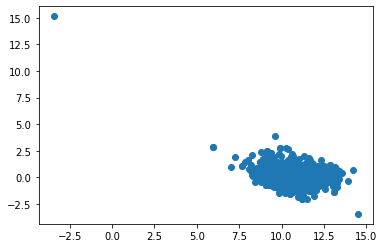

In [434]:
import matplotlib.pyplot as plt
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)

In [435]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
y = np.log(data["alcohol"])
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     2535.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:23:06   Log-Likelihood:                 10694.
No. Observations:                6497   AIC:                        -2.136e+04
Df Residuals:                    6484   BIC:                        -2.127e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   61.2768      0.494    124.079      0.000      60.309      62.245
fixed acidity            0.0493      0.001     61.424      0.000       0.048       0.051
volatile acidity         0.0664      0.005     12.680      0.000       0.056       0.077
citric acid              0.0441      0.005      8.753      0.000       0.034       0.054
residual sugar           0.0208      0.000     76.089      0.000       0.020       0.021
chlorides               -0.0955      0.021     -4.488      0.000      -0.137      -0.054
free sulfur dioxide     -0.0003   4.88e-05     -6.281      0.000      -0.000      -0.000
total sulfur dioxide  -2.17e-05   2.07e-05     -1.051      0.293   -6.22e-05    1.88e-05
density                -60.6660      0.506   -119.847      0.000     -61.658     -59.674
pH                       0.2472      0.005     50.220      0.000       0.238       0.257
sulphates                0.0936      0.005     19.709      0.000       0.084       0.103
quality                  0.0091      0.001     11.604      0.000       0.008       0.011
red                      0.1041      0.003     30.869      0.000       0.097       0.111
==============================================================================
Omnibus:                     7151.804   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5087265.036
Skew:                           4.810   Prob(JB):                         0.00
Kurtosis:                     139.748   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

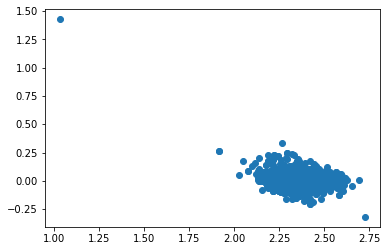

In [436]:
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)

### Log transformation did not change the skedasticity of the residuals. But it is changed the R^2.

# LASSO REGRESSION - with log

In [437]:
from sklearn.linear_model import Lasso
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
y = np.log(data["alcohol"])
X= sm.add_constant(X)                                   
lasso_model = Lasso(alpha = 0.2).fit(X, y) 

In [438]:
lasso_model
lasso_model.coef_ 

array([ 0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.00047697, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ])

In [439]:
from sklearn.linear_model import LassoCV     
lasso_cv_model = LassoCV(alphas = None, cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X,y)
lasso_cv_model.alpha_  

9.508596933335682e-07

### As you can see alpha (lambda) value is small. Because of that it is hard to do calculation for equation. Without log, we will have a bigger alpha value. 

In [440]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)

In [441]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

0.04666516661382175

In [442]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 9.508596933335682e-07).fit(X, y)

In [443]:
lasso_model
lasso_model.coef_

array([ 0.00000000e+00,  4.86119540e-02,  6.70042932e-02,  4.45584614e-02,
        2.04361287e-02, -1.01941386e-01, -3.01113135e-04, -2.98013805e-05,
       -5.99432157e+01,  2.44546763e-01,  9.28245239e-02,  9.52125618e-03,
        1.01888979e-01])

### Lasso with log will give us similiar coefficient values with the OLS with log. 

### The first one is our constant coefficient value and it appears as 0.

# LASSO REGRESSION - without log

### In the Lasso method, we try to find the optimum alpha (lamda) that minimizes MSE .

In [444]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
y = data["alcohol"]
X = sm.add_constant(X)
lasso_model = Lasso(alpha = 0.3).fit(X, y)

In [445]:
from sklearn.linear_model import LassoCV     
lasso_cv_model = LassoCV(alphas = None, cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X,y)
lasso_cv_model.alpha_

1.252709879124095e-05

### The best optimum alpha was found to be 1.252709879124095e-05.

In [446]:
lasso_model
lasso_model.coef_ 

array([ 0.        , -0.        , -0.        ,  0.        , -0.05806033,
       -0.        ,  0.        , -0.00296821, -0.        ,  0.        ,
       -0.        ,  0.19374658, -0.        ])

In [447]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)

In [448]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

0.49754839287064984

In [449]:
lasso_model = Lasso(alpha = lasso_cv_model.alpha_).fit(X, y)

In [450]:
lasso_model
lasso_model.coef_ 

array([ 0.00000000e+00,  5.13444973e-01,  7.96698693e-01,  5.31881787e-01,
        2.24156913e-01, -9.96344859e-01, -3.32163558e-03, -2.06909878e-04,
       -6.46903956e+02,  2.57215080e+00,  9.85058555e-01,  1.08602055e-01,
        1.11650999e+00])

### Lasso method will give us similiar coefficient values with the OLS.

### The first one is our constant coefficient value and it appears as 0.

# RIDGE REGRESSION

In [451]:
X = data.loc[:,["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","quality","red"]]
X = sm.add_constant(X)
y = data["alcohol"]

In [452]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.4).fit(X, y)        
ridge_model.coef_

array([ 0.00000000e+00, -6.25687868e-02,  1.41802237e+00,  9.99178496e-01,
       -6.62487741e-02, -7.22771616e+00,  1.53479600e-03, -7.29351053e-03,
       -1.37588394e+01,  2.58333534e-01,  3.32887661e-01,  4.98213273e-01,
       -8.14212994e-01])

In [453]:
from sklearn.linear_model import RidgeCV         
lambdalar = 10**np.linspace(10,-2,100)*0.5

### It has an alpha value that minimizes MSE. Then the coefficients are recalculated with that alpha value.

In [454]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [455]:
ridge_model = Ridge()
katsayilar = []

In [456]:
for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X, y) 
    katsayilar.append(ridge_model.coef_) 

### Here we calculate MSE for each alpha value.

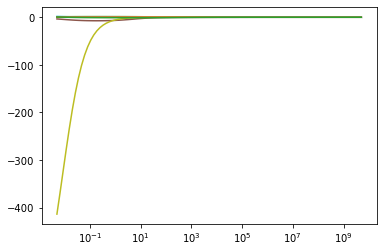

In [457]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log')

### Every line is coefficient vector. In this graph, alpha gets bigger. While this happening, coefficient values goes to zero.

In [458]:
from sklearn.linear_model import RidgeCV                           
ridge_cv=RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error", normalize=True)

### Optimal alpha minimizes MSE.

In [459]:
ridge_cv.fit(X,y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [460]:
ridge_cv.alpha_

0.005

In [461]:
ridge_model = Ridge(alpha = ridge_cv.alpha_).fit(X, y)           
ridge_model.coef_

array([ 0.00000000e+00,  3.00537551e-01,  1.03539967e+00,  7.14806327e-01,
        1.17111016e-01, -3.50890756e+00, -1.52024707e-03, -2.81437860e-03,
       -4.13551504e+02,  1.71347481e+00,  7.55958602e-01,  2.51117437e-01,
        4.12154186e-01])